In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Heuristically

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus **the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.**: the rank-frequency distribution is an inverse relation. 

Suppose we start with $n_1 = 10000$ words of rank 1 type, and $N = 1 000 000$ words in total:

In [105]:
n1 = 10000
N = 1000000
K = 100
f = np.zeros(K)
f[0] = n1 / float(N)
for k in range(2, K):
    f[k-1] = f[0] / float(k)

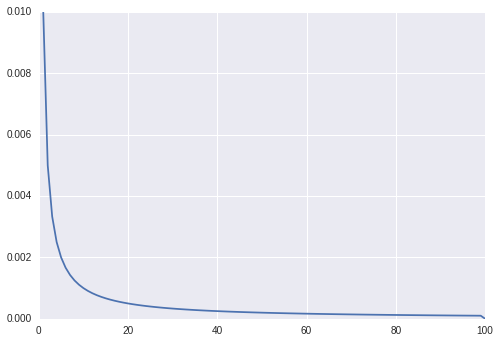

In [107]:
plt.plot(range(1,K+1), f)

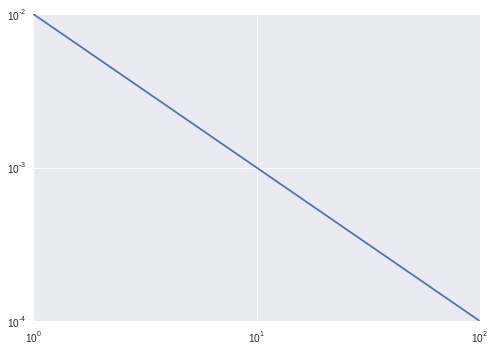

In [109]:
#bins = np.arange(1,20000,0.1)
#hist, bin_edges = np.histogram(x, bins=bins, density=False)
#hist=np.array(hist)
fig, ax = plt.subplots(1,1)
p=ax.plot(range(1,K+1), f)

ax.set_yscale('log')
ax.set_xscale('log')
#plt.xticks(t, rotation='vertical')
#plt.xlim([1,150])
#plt.ylim([1.0/10**5,1])


# Using the formula

Formally, let:

    N be the number of elements;
    k be their rank;
    s be the value of the exponent characterizing the distribution.

Zipf's law then predicts that out of a population of N elements, the frequency of elements of rank k, $f(k;s,N)$, is:

$$f(k;s,N) = \frac{1/k^s}{\sum_{i=1}^N(1/i^s)}$$

Let's fix $s=1.1$ and $N=1 000 000$.

Generate fake data:

In [110]:
s = 1.0
N = 1000000

denom = np.sum(np.arange(1,N+1)**s)


In [111]:
K = 15
f = np.zeros(K)
for k in range(1,K+1):
    f[k-1] = (1/k**s)/denom

In [112]:
# check:
2*f[1]/f[0]

1.0

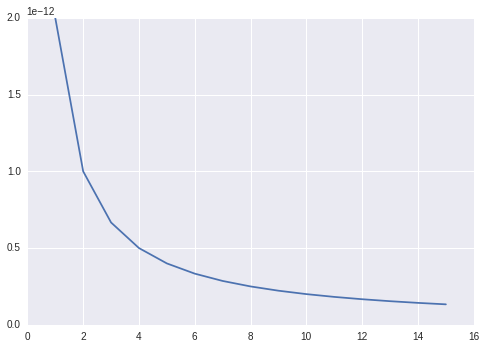

In [113]:
plt.plot(range(1,K+1), f)

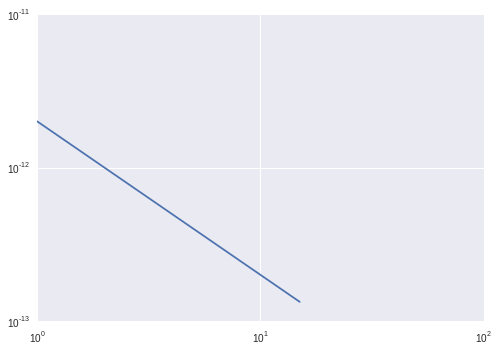

In [114]:
#bins = np.arange(1,20000,0.1)
#hist, bin_edges = np.histogram(x, bins=bins, density=False)
#hist=np.array(hist)
fig, ax = plt.subplots(1,1)
p=ax.plot(range(1,K+1), f)

ax.set_yscale('log')
ax.set_xscale('log')
#plt.xticks(t, rotation='vertical')
#plt.xlim([1,150])
#plt.ylim([1.0/10**5,1])


# Power Law

Zipf's law holds if the number of elements with a given frequency is a random variable with power law distribution $$p(f) = Cf^{-1-1/s}$$

In [95]:
np.min(f)

1.3332000133320001e-09

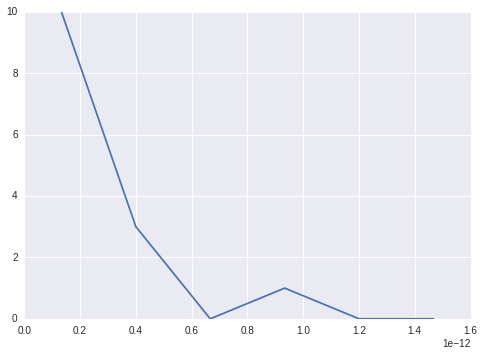

In [119]:
bins = np.arange(np.min(f),np.max(f),np.max(f)/float(K/2.0))
hist, bin_edges = np.histogram(f, bins=bins, density=False) # density True makes area under curve equal to 1
p = plt.plot(bin_edges[:-1],hist)

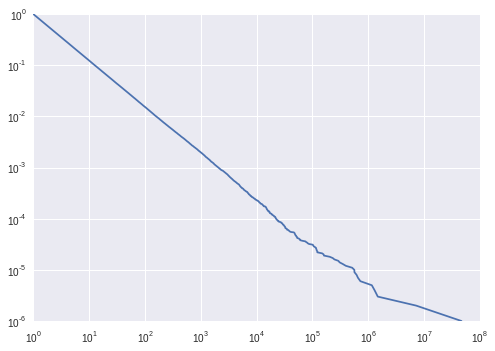

In [120]:
xsorted = np.sort(x)

num = np.arange(x.size,0,-1) / float(x.size)
# plot it!
#plt.bar(bins[:-1], hist_norm, widths)

plt.xscale('log')
plt.yscale('log')


#t = np.arange(0, 10**5, 50)
#t = np.linspace(1,10**5,50)
#print(t)

#plt.xticks(t, rotation='vertical')


#plt.xlim([1,2500])
#plt.ylim([1.0/10**5,1])

plt.plot(xsorted, num)